In [1]:
# importing the required libraries
import pandas as pd
import numpy as np

# mounting google drive
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
# reading the train data
train = pd.read_csv('/content/drive/MyDrive/train_features 2.csv')

In [3]:
# reading the train labels
label = pd.read_csv('/content/drive/MyDrive/train_labels 2.csv')

In [4]:
train

,Recipe_ID,Ingredient_ID,state,quantity,unit
0,2610,3,NaN,3,cups
1,2610,452,NaN,1,cup
2,2610,180,quartered,1,NaN
3,2610,21,quartered,1,NaN
4,2610,1,quartered,1,NaN
...,...,...,...,...,...
807195,147181,34,NaN,3,cups
807196,147181,213,cooked chopped,3,cups
807197,147181,29,peeled cooked mashed,2 1/2,cups
807198,147181,204,chopped,1,tablespoon


In [5]:
train.head(11)

,Recipe_ID,Ingredient_ID,state,quantity,unit
0,2610,3,NaN,3,cups
1,2610,452,NaN,1,cup
2,2610,180,quartered,1,NaN
3,2610,21,quartered,1,NaN
4,2610,1,quartered,1,NaN
5,2610,10,quartered,4,cloves
6,2610,20,ground,2,teaspoons
7,2610,90,NaN,1/2,teaspoon
8,2610,9,cracked,1/2,teaspoon
9,2610,57,ground,1/4,teaspoon


In [6]:
# reading the train data with features combined
train2 = pd.read_csv('/content/drive/MyDrive/result.csv')

In [7]:
train2

,Recipe_ID,Ingredient,state,quantity,Unit
0,2610,"[3, 452, 180, 21, 1, 10, 20, 90, 9, 57]","[nan, nan, 'quartered', 'quartered', 'quartere...","['3', '1', '1', '1', '1', '4', '2', '1/2', '1/...","['cups', 'cup', nan, nan, nan, 'cloves', 'teas..."
1,2611,"[19, 1, 59, 10, 82, 164, 43, 60, 12775]","[nan, 'diced', nan, 'sliced', 'boiling', 'grou...","['1', '1', '2', '2', '2', '1/4', '1', 'to tast...","['tablespoon', nan, 'tablespoons', 'cloves', '..."
2,2612,"[5, 1, 680, 60, 63, 3, 512]","[nan, 'chopped', 'boneless cut', 'ground', nan...","['1/4', '1', '1', 'to taste', '1', '2', '1']","['cup', nan, 'pound', nan, 'can', 'cups', 'pac..."
3,2613,"[1, 5, 259, 22, 261, 10, 20, 57, 0, 221]","['minced', nan, 'rinsed drained', 'sour', nan,...","['1/2', '1 1/2', '1', '1/3', '2', '4', '1', '1...","[nan, 'teaspoons', 'can', 'cup', 'tablespoons'..."
4,2614,"[355, 119, 234, 120, 9, 90]","[nan, nan, nan, nan, 'ground', 'flaked']","['2/3', '1/2', '2', '2', '2', '1']","['cup', 'cup', 'tablespoons', 'tablespoons', '..."
...,...,...,...,...,...
82643,147177,"[18, 40, 0, 2, 282, 960, 232, 238, 64]","[nan, nan, nan, 'unsalted', nan, nan, nan, 'se...","['2', '1/2', '1/4', '1', '1 1/4', '2', '1/2', ...","['cups', 'teaspoon', 'teaspoon', 'cup', '1/4',..."
82644,147178,"[1, 988, 650, 2, 0, 9, 904, 1949, 136, 46, 204...","['peeled', nan, nan, 'unsalted', nan, 'ground'...","['2', '1/2', '3', '2', '1', '1', '3', '2', '1'...","[nan, 'cup', 'tablespoons', 'tablespoons', 'ta..."
82645,147179,"[3277, 10, 16, 48, 1, 46, 17370, 38]","[nan, 'mashed', 'chopped', 'chopped', 'chopped...","['1', '1', '1', '1/2', '1/2', '1/4', nan, '4']","['can', 'clove', 'tablespoon', 'cup', 'cup', '..."
82646,147180,"[491, 2213]","['unsweetened', nan]","['1', '1/4 - 1/3']","['cup', 'cup']"


In [8]:
label

,Recipe_ID,Cuisine
0,2610,Middle Eastern
1,2611,Middle Eastern
2,2612,Middle Eastern
3,2613,Middle Eastern
4,2614,Middle Eastern
...,...,...
82643,147177,Canadian
82644,147178,Canadian
82645,147179,Canadian
82646,147180,Canadian


In [9]:
print("Total Unique Cuisine Classes : {}".format(label['Cuisine'].unique().shape[0]))

Total Unique Cuisine Classes : 26


In [10]:
label['Cuisine'].unique()

array(['Middle Eastern', 'Rest Africa', 'Northern Africa',
       'Chinese and Mongolian', 'Thai', 'Southeast Asian',
       'Indian Subcontinent', 'Korean', 'Japanese', 'Australian',
       'Mexican', 'Caribbean', 'South American', 'Eastern European',
       'Scandinavian', 'UK', 'Belgian', 'Deutschland ', 'Greek', 'French',
       'Spanish and Portuguese', 'Italian', 'Irish', 'US', 'Canadian',
       'Central American'], dtype=object)

In [ ]:
# reading the train data with features combined using context
train3 = pd.read_csv('/content/drive/MyDrive/result_all_combined.csv')

In [ ]:
train3

,Recipe_ID,Ingredient
0,2610,"['3 3 cups ', '452 1 cup ', '180 1 quartered',..."
1,2611,"['19 1 tablespoon ', '1 1 diced', '59 2 tables..."
2,2612,"['5 1/4 cup ', '1 1 chopped', '680 1 pound bon..."
3,2613,"['1 1/2 minced', '5 1 1/2 teaspoons ', '259 1 ..."
4,2614,"['355 2/3 cup ', '119 1/2 cup ', '234 2 tables..."
...,...,...
82643,147177,"['18 2 cups ', '40 1/2 teaspoon ', '0 1/4 teas..."
82644,147178,"['1 2 peeled', '988 1/2 cup ', '650 3 tablespo..."
82645,147179,"['3277 1 can ', '10 1 clove mashed', '16 1 tab..."
82646,147180,"['491 1 cup unsweetened', '2213 1/4 - 1/3 cup ']"


In [11]:
# importing the required libraries
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import svm 
from sklearn.metrics import accuracy_score, confusion_matrix  
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


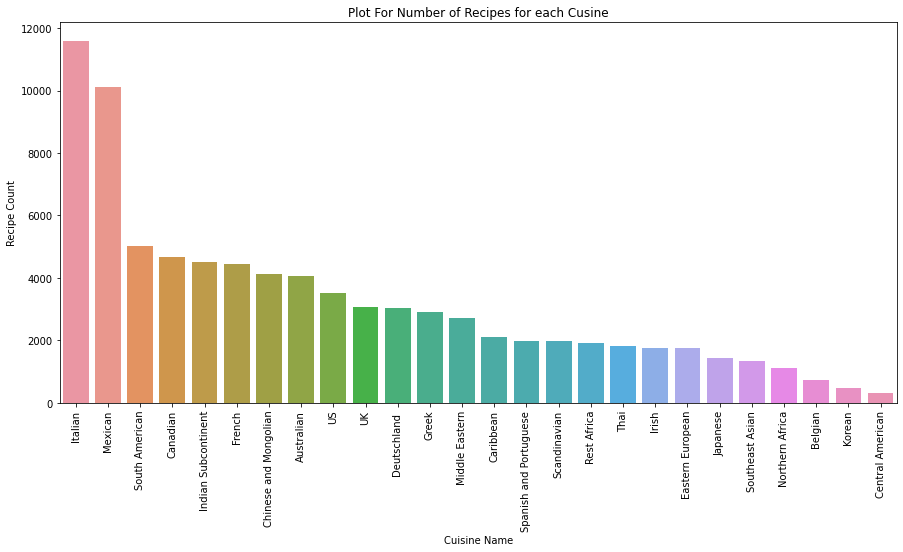

In [12]:
# plotting the graph for number of recipes for each cuisine
fig, ax = plt.subplots(figsize=(15,7))
sns.barplot(label['Cuisine'].value_counts().index,label['Cuisine'].value_counts()[:],ax=ax)
plt.xlabel("Cuisine Name")
plt.ylabel('Recipe Count')
plt.title("Plot For Number of Recipes for each Cusine")
plt.xticks(rotation=90,)
plt.show()

In [14]:
train['Recipe_ID'].nunique()

82648

In [15]:
# Applying the label encoder on the label Cuisine
from sklearn.preprocessing import LabelEncoder
labelEncoder = LabelEncoder()
label['Cuisine']=labelEncoder.fit_transform(label['Cuisine'])

In [16]:
label = label.drop(['Recipe_ID'], axis = 1)

In [17]:
label

,Cuisine
0,16
1,16
2,16
3,16
4,16
...,...
82643,2
82644,2
82645,2
82646,2


In [18]:
print("Total Unique Cuisine Classes : {}".format(label['Cuisine'].unique().shape[0]))

Total Unique Cuisine Classes : 26


In [19]:
# Function for converting string into list
def Convert(string):
    li = list(string.split(","))
    return li

In [20]:
# Making ingredient list of each recipe id
temp1 = []
for ing in train2['Ingredient']:
  l = len(ing)
  st = ing[1:l-1]
  temp1.append(Convert(st))

In [ ]:
temp1

[['3', ' 452', ' 180', ' 21', ' 1', ' 10', ' 20', ' 90', ' 9', ' 57'],
 ['19', ' 1', ' 59', ' 10', ' 82', ' 164', ' 43', ' 60', ' 12775'],
 ['5', ' 1', ' 680', ' 60', ' 63', ' 3', ' 512'],
 ['1', ' 5', ' 259', ' 22', ' 261', ' 10', ' 20', ' 57', ' 0', ' 221'],
 ['355', ' 119', ' 234', ' 120', ' 9', ' 90'],
 ['301', ' 112', ' 159', ' 355', ' 94', ' 109', ' 39', ' 11', ' 74'],
 ['34', ' 185', ' 2', ' 2247', ' 1', ' 195', ' 17', ' 0', ' 18', ' 163'],
 ['189',
  ' 3',
  ' 4787',
  ' 0',
  ' 9',
  ' 5',
  ' 163',
  ' 10',
  ' 79',
  ' 114',
  ' 2437',
  ' 144'],
 ['886', ' 5', ' 1', ' 8', ' 20', ' 16', ' 17', ' 13', ' 69'],
 ['181',
  ' 108',
  ' 57',
  ' 53',
  ' 20',
  ' 2157',
  ' 172',
  ' 179',
  ' 11281',
  ' 3',
  ' 60',
  ' 5',
  ' 102',
  ' 10',
  ' 8',
  ' 2',
  ' 82',
  ' 1085'],
 ['3', ' 2131', ' 11', ' 64', ' 15'],
 ['5', ' 1', ' 886', ' 35', ' 339', ' 10', ' 13'],
 ['7', ' 9', ' 106', ' 11', ' 19'],
 ['2558', ' 60', ' 2', ' 1', ' 65', ' 356', ' 43', ' 3'],
 ['64', ' 119', ' 18

In [ ]:
type(temp1[0][0])

str

In [21]:
# Removing null values from the list
for j in range(5):
    i= 0
    none= []
    for ingredient in temp1:
        if None in ingredient:
            temp1[i].remove(None)
        i+=1

In [22]:
# Making set of all ingredient ids in our dataset
all_ingredients = set()
for ingredients in temp1:
    all_ingredients = all_ingredients | set(ingredients)
len(all_ingredients)

20297

In [23]:
all_ingredients

{' 17030',
 ' 10139',
 '19507',
 '449',
 '6108',
 ' 1634',
 '474',
 ' 10298',
 ' 7007',
 ' 3534',
 '540',
 ' 19308',
 ' 14646',
 ' 3684',
 '11990',
 ' 7293',
 '10873',
 ' 5176',
 ' 8725',
 ' 14708',
 ' 14127',
 '5052',
 ' 18607',
 ' 2654',
 '6699',
 ' 13092',
 '8761',
 '2148',
 ' 1795',
 ' 2928',
 ' 7722',
 ' 19340',
 '5652',
 ' 18846',
 ' 6623',
 '19858',
 ' 3321',
 ' 8164',
 ' 3114',
 ' 9722',
 ' 414',
 ' 12654',
 ' 15559',
 ' 7672',
 '1669',
 ' 18316',
 ' 10862',
 ' 2204',
 '13716',
 ' 7393',
 ' 3249',
 ' 15329',
 ' 4417',
 ' 14131',
 '1040',
 ' 9764',
 ' 15769',
 ' 11691',
 ' 13248',
 ' 7925',
 ' 16272',
 ' 6218',
 ' 726',
 ' 28',
 '2862',
 '1714',
 ' 2985',
 '3749',
 ' 9071',
 ' 19833',
 ' 14979',
 ' 1491',
 ' 2249',
 ' 11857',
 ' 15623',
 '5524',
 ' 2740',
 ' 5564',
 ' 8960',
 '2388',
 '8929',
 ' 580',
 ' 11262',
 ' 5158',
 ' 80',
 '14910',
 ' 432',
 ' 2791',
 ' 8241',
 ' 10356',
 ' 5262',
 ' 15983',
 ' 12645',
 ' 8924',
 ' 14848',
 '4021',
 ' 19844',
 ' 10790',
 '12041',
 ' 8316

In [24]:
# Making dictionary of ingredient id 
ingr_dict = {}
for ingredient, i in zip(all_ingredients, range(len(all_ingredients))):
    ingr_dict[ingredient] = i

In [25]:
ingr_dict

{' 17030': 0,
 ' 10139': 1,
 '19507': 2,
 '449': 3,
 '6108': 4,
 ' 1634': 5,
 '474': 6,
 ' 10298': 7,
 ' 7007': 8,
 ' 3534': 9,
 '540': 10,
 ' 19308': 11,
 ' 14646': 12,
 ' 3684': 13,
 '11990': 14,
 ' 7293': 15,
 '10873': 16,
 ' 5176': 17,
 ' 8725': 18,
 ' 14708': 19,
 ' 14127': 20,
 '5052': 21,
 ' 18607': 22,
 ' 2654': 23,
 '6699': 24,
 ' 13092': 25,
 '8761': 26,
 '2148': 27,
 ' 1795': 28,
 ' 2928': 29,
 ' 7722': 30,
 ' 19340': 31,
 '5652': 32,
 ' 18846': 33,
 ' 6623': 34,
 '19858': 35,
 ' 3321': 36,
 ' 8164': 37,
 ' 3114': 38,
 ' 9722': 39,
 ' 414': 40,
 ' 12654': 41,
 ' 15559': 42,
 ' 7672': 43,
 '1669': 44,
 ' 18316': 45,
 ' 10862': 46,
 ' 2204': 47,
 '13716': 48,
 ' 7393': 49,
 ' 3249': 50,
 ' 15329': 51,
 ' 4417': 52,
 ' 14131': 53,
 '1040': 54,
 ' 9764': 55,
 ' 15769': 56,
 ' 11691': 57,
 ' 13248': 58,
 ' 7925': 59,
 ' 16272': 60,
 ' 6218': 61,
 ' 726': 62,
 ' 28': 63,
 '2862': 64,
 '1714': 65,
 ' 2985': 66,
 '3749': 67,
 ' 9071': 68,
 ' 19833': 69,
 ' 14979': 70,
 ' 1491': 71,


In [26]:
# Making corpus of all the ingredient id present in recipe
corpus = [' '.join(ingredients) for ingredients in temp1]

In [27]:
# Applying the count vectoriser on the list of ingredient id of each recipe
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(vocabulary=ingr_dict)
train = vectorizer.fit_transform(corpus)

In [28]:
# Applying the Tfidf Transformer on the trained matrix available from the count vectoriser
from sklearn.feature_extraction.text import TfidfTransformer
tfidf = TfidfTransformer()
train = tfidf.fit_transform(train)

In [ ]:
# Applying the Tfidf Vectoriser on the corpus
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(binary = True)
train = tfidf.fit_transform(corpus)

In [29]:
# Splitting of data into train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(train,label['Cuisine'],test_size=0.25,random_state=0,stratify=label['Cuisine'])

In [30]:
X = train
y = label['Cuisine']

In [31]:
# Oversampling for removing class imbalance
from imblearn.over_sampling import RandomOverSampler, SMOTE
overSampler = RandomOverSampler(sampling_strategy='not majority')
X_train,y_train = overSampler.fit_resample(X_train,y_train)

In [32]:
from imblearn.over_sampling import RandomOverSampler, SMOTE
overSampler = RandomOverSampler(sampling_strategy='not majority')
X,y = overSampler.fit_resample(X,y)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


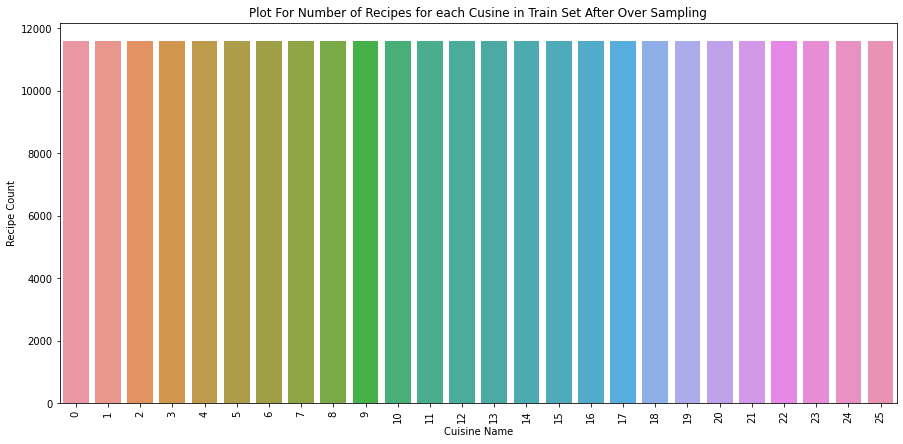

In [34]:
# Plotting the graph after oversampling
fig, ax = plt.subplots(figsize=(15,7))
sns.barplot(y.value_counts().index,y.value_counts()[:],ax=ax)
plt.xlabel("Cuisine Name")
plt.ylabel('Recipe Count')
plt.title("Plot For Number of Recipes for each Cusine in Train Set After Over Sampling")
plt.xticks(rotation=90,)
plt.show()

In [35]:
# importing the required libraries
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression

## Logistic Regression

In [37]:
# training the model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
model.fit(X_train, y_train)
model.fit(X_train, y_train)
y_pred=model.predict(X_test)

accuracy=accuracy_score(y_train,model.predict(X_train))
print("Accuracy using Multinomial on Train Data: ",accuracy)
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy using Multinomial on Test Data: ",accuracy)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy using Multinomial on Train Data:  0.6405541361293574
Accuracy using Multinomial on Test Data:  0.5080824702352144


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from imblearn.over_sampling import RandomOverSampler, SMOTE
overSampler = RandomOverSampler(sampling_strategy='not majority')
X,y = overSampler.fit_resample(train,label['Cuisine'])

## SVM (Linear)

In [ ]:
classifier1 =svm.LinearSVC(C=0.5, max_iter=100, random_state=91, tol=0.1)
classifier1.fit(X, y)

In [ ]:
predx = classifier1.predict(test2)

In [ ]:
classifier2 = SVC(kernel ='rbf', random_state = 0)
classifier2.fit(X, y)

SVC(random_state=0)

## Random Forest Classifier

In [ ]:
classifier3 = RandomForestClassifier()
classifier3.fit(X, y)

RandomForestClassifier()

In [ ]:
import pickle
filename = 'saved_model.sav'
pickle.dump(classifier2, open(filename, 'wb'))

In [ ]:
classifier=svm.LinearSVC(C=0.5, max_iter=100, random_state=91, tol=0.1)
classifier.fit(X_train, y_train)
y_pred=classifier.predict(X_test)
accuracy=accuracy_score(y_train,classifier.predict(X_train))
print("Accuracy using SVM on Train Data: ",accuracy)
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy using SVM on Test Data: ",accuracy)

Accuracy using SVM on Train Data:  0.6672000565805876
Accuracy using SVM on Test Data:  0.4886748620656277


In [ ]:
%%time
classifier=svm.LinearSVC(C=0.5, max_iter=100, random_state=91, tol=0.1)
classifier.fit(X_train, y_train)
y_pred=classifier.predict(X_test)
accuracy=accuracy_score(y_train,classifier.predict(X_train))
print("Accuracy using SVM on Train Data: ",accuracy)
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy using SVM on Test Data: ",accuracy)

Accuracy using SVM on Train Data:  0.6577846931829233
Accuracy using SVM on Test Data:  0.5015487368115381
CPU times: user 16.2 s, sys: 98.9 ms, total: 16.3 s
Wall time: 16.6 s


## XGBoost Classifier

In [ ]:
classifierXG=XGBClassifier()
classifierXG.fit(X_train, y_train)
y_pred=classifierXG.predict(X_test)
accuracy=accuracy_score(y_train,classifierXG.predict(X_train))
print("Accuracy using RF on Train Data: ",accuracy)
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy using RF on Test Data: ",accuracy)

Accuracy using RF on Train Data:  0.539712499889491
Accuracy using RF on Test Data:  0.45697415545445746


## Five fold for Linear SVC

In [ ]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['linear']}
 
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)

# Fitting the grid Search model

grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.561 total time=35.2min
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.561 total time=39.2min


## Multilevel Perceptron

In [38]:
clf=MLPClassifier()
clf.fit(X_train,y_train)
print(clf.score(X_test,y_test))

0.4499080437518149


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
classifier = SVC(kernel ='rbf', random_state = 0)
#classifier=svm.LinearSVC(C=0.5, max_iter=10, random_state=91, tol=0.1)
classifier.fit(X_train, y_train)
y_pred=classifier.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy using SVM : ",accuracy)

In [ ]:
classifier=RandomForestClassifier()
classifier.fit(X_train, y_train)
y_pred=classifier.predict(X_test)
accuracy=accuracy_score(y_train,classifier.predict(X_train))
print("Accuracy using RF on Train Data: ",accuracy)
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy using RF on Test Data: ",accuracy)

Accuracy using RF on Train Data:  0.9872958899507572
Accuracy using RF on Test Data:  0.5167457167747556


## Extra Tree Classifier

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.datasets import make_classification
classifier2=ExtraTreesClassifier(n_estimators=1000, random_state=0)
classifier2.fit(X_train, y_train)
y_pred=classifier2.predict(X_test)
accuracy=accuracy_score(y_train,classifier.predict(X_train))
print("Accuracy using RF on Train Data: ",accuracy)
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy using RF on Test Data: ",accuracy)

In [ ]:
classifier=RandomForestClassifier()
classifier.fit(X, y)

RandomForestClassifier()

### For testing purpose

In [ ]:
test = pd.read_csv('/content/drive/MyDrive/result_test.csv')

In [ ]:
test

,Recipe_ID,Ingredient,state,quantity,Unit
0,17245,"[7753, 90, 692, 46, 45, 9, 54, 2542, 76, 35, 1...","[nan, nan, nan, nan, nan, 'ground', nan, nan, ...","[nan, '2/3', '1', '2', '2', '1', '1', nan, '2'...","[nan, 'cup', 'ounce', 'teaspoons', 'teaspoons'..."
1,17246,"[210, 879, 43, 1, 114, 8, 5]","['cut lean', 'peeled', nan, 'sliced', nan, 'cr...","['4', '2', '2', '1', '10', '1', '1/3']","['pounds', nan, nan, nan, nan, 'can', 'cup']"
2,17247,"[3077, 19, 154, 78, 26, 30, 379, 10, 333]","['untreated', nan, nan, nan, nan, 'chopped', '...","['3', '1/3', '1 1/2', '1', '1/3', '1/4', '1', ...","[nan, 'cup', 'tablespoons', 'teaspoon', 'cup',..."
3,17248,"[11, 12083, 891]","[nan, nan, 'brewed']","['1 1/4', '2', '1']","['cups', 'tablespoons', 'jigger']"
4,17249,"[67, 1, 27, 2624, 86, 114, 700, 139, 7, 5558, ...","['cut', 'chopped', 'ground', 'ground', 'choppe...","['1', '2', '5', '5', '3', '3', '3', '1', '3', ...","['pound', nan, 'pounds', 'pounds', 'packages',..."
...,...,...,...,...,...
35430,149187,"[2960, 97, 69, 449, 607, 48, 41, 10, 13, 4377]","['peeled cut', 'chopped', 'chopped', 'chopped'...","['1', '1', '1/4', '1/4', '1/4', '1', '6', '3',...","['cup', nan, 'cup', 'cup', 'cup', 'stalk', nan..."
35431,149188,"[1867, 3, 23, 689]","['peeled cored chopped', nan, 'ground', nan]","['4', '1/4', '1', '3']","['cups', 'cup', 'teaspoon', nan]"
35432,149189,"[5, 1, 29, 236, 0, 12]","[nan, 'sliced', 'peeled cut sweet', nan, nan, ...","['2', '1', '2', '1/2', nan, nan]","['teaspoons', 'cup', nan, 'cup', nan, nan]"
35433,149190,"[126, 6, 77, 40, 0, 14, 2703]","[nan, nan, nan, nan, nan, nan, nan]","['1/3', '1/3', '1', '1/2', '1/8', '1 1/2', '1/3']","['cup', 'cup', 'teaspoon', 'teaspoon', 'teaspo..."


In [ ]:
test1 = []
for ing in test['Ingredient']:
  l = len(ing)
  st = ing[1:l-1]
  test1.append(Convert(st))

In [ ]:
test1

[['7753',
  ' 90',
  ' 692',
  ' 46',
  ' 45',
  ' 9',
  ' 54',
  ' 2542',
  ' 76',
  ' 35',
  ' 10',
  ' 138',
  ' 87',
  ' 5',
  ' 1',
  ' 49',
  ' 108',
  ' 39',
  ' 60',
  ' 3688',
  ' 6202',
  ' 27',
  ' 347',
  ' 1279',
  ' 561'],
 ['210', ' 879', ' 43', ' 1', ' 114', ' 8', ' 5'],
 ['3077', ' 19', ' 154', ' 78', ' 26', ' 30', ' 379', ' 10', ' 333'],
 ['11', ' 12083', ' 891'],
 ['67',
  ' 1',
  ' 27',
  ' 2624',
  ' 86',
  ' 114',
  ' 700',
  ' 139',
  ' 7',
  ' 5558',
  ' 2297'],
 ['188', ' 160', ' 92', ' 18982'],
 ['19',
  ' 1',
  ' 41',
  ' 60',
  ' 19298',
  ' 8977',
  ' 17546',
  ' 75',
  ' 726',
  ' 11865'],
 ['2', ' 3417', ' 72', ' 1200', ' 1710', ' 1349', ' 331'],
 ['5', ' 2459', ' 10', ' 422', ' 184', ' 56', ' 144'],
 ['2331', ' 305', ' 1589', ' 10', ' 5', ' 1393', ' 11', ' 72', ' 647'],
 ['10', ' 23', ' 31', ' 30', ' 58', ' 161', ' 1498'],
 ['30',
  ' 762',
  ' 96',
  ' 334',
  ' 26',
  ' 1118',
  ' 23',
  ' 107',
  ' 185',
  ' 343',
  ' 119'],
 ['39', ' 2', ' 7', ' 160'

In [ ]:
for j in range(5):
    i= 0
    none= []
    for ingredient in test1:
        if None in ingredient:
            test1[i].remove(None)
        i+=1

In [ ]:
all_ingredients1 = set()
for ingredients in test1:
    all_ingredients1 = all_ingredients1 | set(ingredients)
len(all_ingredients1)

12211

In [ ]:
corpus1 = [' '.join(ingredients) for ingredients in test1]

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(vocabulary=ingr_dict)
test2 = vectorizer.fit_transform(corpus1)

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf = TfidfTransformer()
test2 = tfidf.fit_transform(test2)

In [ ]:
predy = classifier1.predict(test2)

In [ ]:
predSVM = classifier2.predict(test2)

In [ ]:
predRF = classifier.predict(test2)

In [ ]:
predRF


array([12, 20,  5, ...,  6, 11, 16])

In [ ]:
len(predy)

35435

In [ ]:
newLabel = labelEncoder.inverse_transform(predRF)

In [ ]:
newLabel

array(['Italian', 'South American', 'Chinese and Mongolian', ...,
       'Deutschland ', 'Irish', 'Middle Eastern'], dtype=object)

In [ ]:
testx = pd.read_csv('/content/drive/MyDrive/result_test.csv')

In [ ]:
testx['Cuisine'] = newLabel

In [ ]:
testy = testx.drop(['Ingredient', 'state', 'quantity', 'Unit'], axis = 1)

In [ ]:
testy

,Recipe_ID,Cuisine
0,17245,Italian
1,17246,South American
2,17247,Chinese and Mongolian
3,17248,Mexican
4,17249,South American
...,...,...
35430,149187,Canadian
35431,149188,Korean
35432,149189,Deutschland
35433,149190,Irish


In [ ]:
testy.to_csv('upload2.csv', index = False)

In [ ]:
print(test2)

  (0, 20030)	0.18172886501661825
  (0, 18309)	0.16499152801523193
  (0, 17416)	0.19119153250256912
  (0, 16502)	0.1862459721554364
  (0, 16099)	0.16263768559134678
  (0, 15099)	0.3606271627563997
  (0, 14942)	0.1775651100182405
  (0, 14700)	0.39269141276394776
  (0, 13928)	0.14057105389651825
  (0, 9914)	0.12036647001179308
  (0, 9510)	0.1541817221478883
  (0, 8911)	0.24645746401842644
  (0, 7744)	0.3008182592577552
  (0, 6208)	0.15955977805211055
  (0, 5791)	0.2740350639908859
  (0, 4352)	0.2854742637119899
  (0, 3749)	0.19046142080128242
  (0, 1794)	0.1608326126092978
  (0, 1276)	0.1995439045856506
  (0, 664)	0.1816810533244198
  (1, 20180)	0.41970753614258866
  (1, 17353)	0.6959111282993926
  (1, 16551)	0.4717755854953227
  (1, 14662)	0.34202497356878686
  (2, 20122)	0.2070885864802436
  :	:
  (35430, 17245)	0.22435550871923052
  (35430, 15674)	0.20472766553224603
  (35430, 12353)	0.3621913804364637
  (35430, 11614)	0.3292341143893908
  (35430, 10014)	0.2499883724036674
  (35430, 99

In [ ]:
corpus

['3  452  180  21  1  10  20  90  9  57',
 '19  1  59  10  82  164  43  60  12775',
 '5  1  680  60  63  3  512',
 '1  5  259  22  261  10  20  57  0  221',
 '355  119  234  120  9  90',
 '301  112  159  355  94  109  39  11  74',
 '34  185  2  2247  1  195  17  0  18  163',
 '189  3  4787  0  9  5  163  10  79  114  2437  144',
 '886  5  1  8  20  16  17  13  69',
 '181  108  57  53  20  2157  172  179  11281  3  60  5  102  10  8  2  82  1085',
 '3  2131  11  64  15',
 '5  1  886  35  339  10  13',
 '7  9  106  11  19',
 '2558  60  2  1  65  356  43  3',
 '64  119  1854  71  682  438  120  57  53',
 '3  39  93  52  19  0  18  7  420',
 '196  39  7  4296  18  0',
 '27  1  76  28  13  890',
 '301  11  39  52  94  64  163  700  109',
 '789  3  172  402  19  1  10  8  54  13',
 '18  0  11  5',
 '886  49  16  24  138  10  57  0  20  119  19',
 '19  185  3  0  402  9071  1  10  132  8  59  9  20  53',
 '3  39  17  148  47  18  151  32',
 '5  768  11651  0  3',
 '162  27  8128  7  60  5  3 

In [ ]:
lis = ['1', '-4', '3', '-6', '7']
res = [eval(i) for i in lis]
print("Modified list is: ", res)

In [ ]:
length = 0
for li in temp1:
  res = [eval(i) for i in li]
  length = max(length, len(res))

In [ ]:
length

38

In [ ]:
ll = []
for ing in train2['Ingredient']:
  l = len(ing)
  st = ing[1:l-1]
  for value in Convert(st):
    ll.append(value)

In [ ]:
ll = set(ll)
len(ll)

20297

In [ ]:
ll

{' 3125',
 ' 7182',
 ' 388',
 '19377',
 ' 5882',
 ' 16850',
 ' 18206',
 ' 13946',
 '809',
 ' 15014',
 ' 17',
 '10657',
 ' 16890',
 '2399',
 '933',
 '19453',
 ' 9642',
 ' 20082',
 ' 15204',
 ' 603',
 ' 8920',
 ' 5441',
 '2393',
 '17247',
 ' 18461',
 ' 2144',
 ' 773',
 ' 3634',
 ' 6417',
 ' 19601',
 ' 15127',
 '16594',
 '6687',
 ' 9462',
 ' 11164',
 ' 8672',
 ' 3705',
 ' 5260',
 '385',
 ' 6122',
 ' 8132',
 ' 1286',
 '2711',
 '4358',
 ' 3724',
 ' 12894',
 ' 19908',
 ' 17193',
 '11979',
 '16338',
 ' 3867',
 ' 18736',
 ' 20160',
 ' 18262',
 '116',
 ' 10408',
 '2465',
 ' 9470',
 ' 19316',
 ' 14474',
 ' 3066',
 ' 11028',
 '6589',
 ' 1409',
 ' 768',
 ' 6408',
 ' 18626',
 ' 10513',
 '1752',
 '18122',
 '3391',
 ' 18746',
 ' 15591',
 ' 14729',
 ' 19726',
 ' 1943',
 ' 379',
 ' 9309',
 ' 2869',
 '2361',
 ' 15120',
 ' 19880',
 ' 13567',
 ' 7833',
 ' 14154',
 ' 8639',
 ' 17438',
 ' 6050',
 '4846',
 ' 19538',
 '151',
 '11607',
 ' 11812',
 ' 4568',
 ' 13855',
 ' 2498',
 ' 2950',
 ' 12039',
 '5588',
 '1

In [ ]:
newL = []
for i in ll:
  i = int(i)
  newL.append(i)

In [ ]:
newL = set(newL)

In [ ]:
len(newL)

16515

In [ ]:
newL

{0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.5 MB 21.9 MB/s 
     |████████████████████████████████| 182 kB 73.4 MB/s 
     |████████████████████████████████| 7.6 MB 49.6 MB/s 


In [ ]:
import torch

## RNN Keras + LSTM

In [ ]:
from nltk.corpus import stopwords 
import pandas as pd
import tweepy
import nltk
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import nltk
nltk.download('punkt')
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk import pos_tag
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding,SpatialDropout1D
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping,ModelCheckpoint
import pickle
import keras
import re
import nltk
import string
from sklearn.metrics import confusion_matrix, accuracy_score, plot_confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
from keras.utils import pad_sequences
max_words = 40
max_len = 10
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(temp1)
sequences = tokenizer.texts_to_sequences(temp1)
sequences_matrix = keras.utils.pad_sequences(sequences,maxlen=max_len)

In [ ]:
sequences_matrix

array([[ 0,  0,  0, ..., 10, 18,  9],
       [ 0,  0,  0, ...,  0,  2, 10],
       [ 0,  0,  0, ...,  0,  2,  4],
       ...,
       [ 0,  0,  0, ..., 10, 16,  2],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ..., 19, 35,  9]], dtype=int32)

In [ ]:
seq_model = Sequential()
seq_model.add(Embedding(max_words, 40, input_length=max_len))
seq_model.add(SpatialDropout1D(0.32))
seq_model.add(LSTM(100))
seq_model.add(Dense(1, activation='sigmoid'))
seq_model.summary()
seq_model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 10, 40)            1600      
                                                                 
 spatial_dropout1d_1 (Spatia  (None, 10, 40)           0         
 lDropout1D)                                                     
                                                                 
 lstm_1 (LSTM)               (None, 100)               56400     
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 58,101
Trainable params: 58,101
Non-trainable params: 0
_________________________________________________________________


In [ ]:
early_stopp = EarlyStopping(
    monitor='val_accuracy', 
    mode='max',
    patience=10
)

In [ ]:
trained_model = seq_model.fit(sequences_matrix,label['Cuisine'],batch_size=1024,epochs=6,validation_split = 0.25, callbacks=[early_stopp])

Epoch 1/6
61/61 [==============================] - 11s 139ms/step - loss: -118.7616 - accuracy: 0.0063 - val_loss: -155.6975 - val_accuracy: 0.0173
Epoch 2/6
61/61 [==============================] - 8s 131ms/step - loss: -266.8097 - accuracy: 0.0062 - val_loss: -218.4682 - val_accuracy: 0.0173
Epoch 3/6
61/61 [==============================] - 8s 130ms/step - loss: -351.4041 - accuracy: 0.0062 - val_loss: -275.7071 - val_accuracy: 0.0173
Epoch 4/6
61/61 [==============================] - 8s 130ms/step - loss: -432.2699 - accuracy: 0.0062 - val_loss: -332.0032 - val_accuracy: 0.0173
Epoch 5/6
61/61 [==============================] - 8s 131ms/step - loss: -511.4924 - accuracy: 0.0062 - val_loss: -387.0482 - val_accuracy: 0.0173
Epoch 6/6
61/61 [==============================] - 8s 133ms/step - loss: -589.4077 - accuracy: 0.0062 - val_loss: -441.3376 - val_accuracy: 0.0173
